In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn import preprocessing

In [40]:
# Prepare the data
data_path = "../data/generated/training.csv"
df = pd.read_csv(data_path)

# shuffle the data
for i in range(10):
    df = shuffle(df)
    
# Import data
# x is all columns but the last
x =  df.iloc[:, 1].values
# y is the last column
y = df.iloc[:, -1].values

# set cooperative as 0, additive as 1
y_bin = [0 if y[i] == "cooperative" else 1 for i in range(len(y))]

In [41]:
print(y_bin)

[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


In [44]:
# get 12 values for K
x = x.reshape(-1, 1)
y_bin = np.array(y_bin)
K = [10000,5000,1000,100,10, 1, 0.1, 0.01, 0.001, 0.0001,0.00001, 0.000001]
cv = KFold(n_splits=10)
output = []
for k in K:
    acc = 0
    i = 1
    # Train with the 9 cross validation, test with 1, for all splits
    for train,test in cv.split(x,y_bin):
        print("Starting with", i, "th fold for", k)
        clf = LogisticRegression(C=k)
        y_score = clf.fit(x[train], y_bin[train]).predict(x[test])
        print("Done with", i, "th fold")
        i += 1
        acc += accuracy_score(y_bin[test].ravel(),y_score.ravel())
    # get the average
    output.append(acc/10)

Starting with 1 th fold for 10000
Done with 1 th fold
Starting with 2 th fold for 10000
Done with 2 th fold
Starting with 3 th fold for 10000
Done with 3 th fold
Starting with 4 th fold for 10000
Done with 4 th fold
Starting with 5 th fold for 10000
Done with 5 th fold
Starting with 6 th fold for 10000
Done with 6 th fold
Starting with 7 th fold for 10000
Done with 7 th fold
Starting with 8 th fold for 10000
Done with 8 th fold
Starting with 9 th fold for 10000
Done with 9 th fold
Starting with 10 th fold for 10000
Done with 10 th fold
Starting with 1 th fold for 5000
Done with 1 th fold
Starting with 2 th fold for 5000
Done with 2 th fold
Starting with 3 th fold for 5000
Done with 3 th fold
Starting with 4 th fold for 5000
Done with 4 th fold
Starting with 5 th fold for 5000
Done with 5 th fold
Starting with 6 th fold for 5000
Done with 6 th fold
Starting with 7 th fold for 5000
Done with 7 th fold
Starting with 8 th fold for 5000
Done with 8 th fold
Starting with 9 th fold for 5000
D

In [45]:
# report the output
for k, res in zip(K, output):
    print("The average validation accuracy for paremeter", k, "is", res)

The average validation accuracy for paremeter 10000 is 0.5992943548387097
The average validation accuracy for paremeter 5000 is 0.5992943548387097
The average validation accuracy for paremeter 1000 is 0.5992943548387097
The average validation accuracy for paremeter 100 is 0.5992943548387097
The average validation accuracy for paremeter 10 is 0.5992943548387097
The average validation accuracy for paremeter 1 is 0.6181451612903227
The average validation accuracy for paremeter 0.1 is 0.6375000000000001
The average validation accuracy for paremeter 0.01 is 0.6375000000000001
The average validation accuracy for paremeter 0.001 is 0.6375000000000001
The average validation accuracy for paremeter 0.0001 is 0.6375000000000001
The average validation accuracy for paremeter 1e-05 is 0.6375000000000001
The average validation accuracy for paremeter 1e-06 is 0.6375000000000001


[['additive']
 ['additive']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['additive']
 ['additive']
 ['cooperative']
 ['additive']
 ['additive']
 ['additive']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['additive']
 ['additive']
 ['additive']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['cooperative']
 ['additive']
 ['additive']
 ['cooperative']
 ['additive']
 ['addit

Beginning our 10 fold cross validation
Starting with 1 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 1 th fold
Starting with 2 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 2 th fold
Starting with 3 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 3 th fold
Starting with 4 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 4 th fold
Starting with 5 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 5 th fold
Starting with 6 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 6 th fold
Starting with 7 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 7 th fold
Starting with 8 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done with 8 th fold
Starting with 9 th fold
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Done 

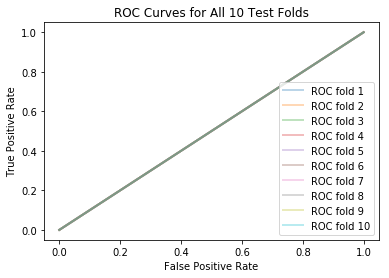

In [51]:
clf = LogisticRegression(C=0.1)
cv = KFold(n_splits=10,shuffle=False)
# Compute ROC curve and ROC area
i = 1
print("Beginning our 10 fold cross validation")
for train,test in cv.split(x,y_bin):
    print("Starting with", i, "th fold")
    y_score = clf.fit(x[train], y_bin[train]).predict(x[test])
    print(y_score)
    print("Done with", i, "th fold")
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_bin[test].ravel(), y_score.ravel())
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d' % (i))
    i += 1

# Show the ROC curves for all 10 test folds on the same plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All 10 Test Folds')
plt.legend(loc="lower right")
plt.show()

In [49]:
print(y_bin)

[1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1]
